## Pareto Front ##

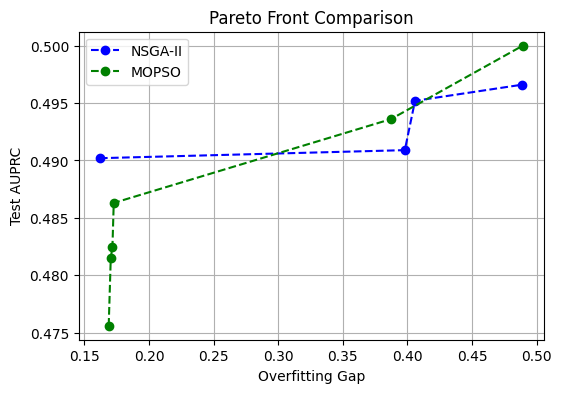

In [5]:
import matplotlib.pyplot as plt

#manually insert solutions
solutions1 = [  #ngsa2
    {"test_auprc": 0.4966, "gap": 0.4885},
    {"test_auprc": 0.4952, "gap": 0.4059},
    {"test_auprc": 0.4909, "gap": 0.3980},
    {"test_auprc": 0.4902, "gap": 0.1620},
]

solutions2 = [  #mopso
    {"test_auprc": 0.4756, "gap": 0.1688},
    {"test_auprc": 0.4815, "gap": 0.1704},
    {"test_auprc": 0.4825, "gap": 0.1717},
    {"test_auprc": 0.4863, "gap": 0.1727},
    {"test_auprc": 0.4936, "gap": 0.3872},
    {"test_auprc": 0.5000, "gap": 0.4892},
]

#sort solutions by gap for consistent line drawing
solutions1_sorted = sorted(solutions1, key=lambda s: s['gap'])
solutions2_sorted = sorted(solutions2, key=lambda s: s['gap'])

nsga2_gap = [s['gap'] for s in solutions1_sorted]
nsga2_auprc = [s['test_auprc'] for s in solutions1_sorted]

mopso_gap = [s['gap'] for s in solutions2_sorted]
mopso_auprc = [s['test_auprc'] for s in solutions2_sorted]

plt.figure(figsize=(6, 4))
plt.plot(nsga2_gap, nsga2_auprc, '--o', color='blue', label='NSGA-II', markersize=6)
plt.plot(mopso_gap, mopso_auprc, '--o', color='green', label='MOPSO', markersize=6)

plt.xlabel("Overfitting Gap")
plt.ylabel("Test AUPRC")
plt.title("Pareto Front Comparison")
plt.legend()
plt.grid(True)
plt.show()


## Heatmaps ##

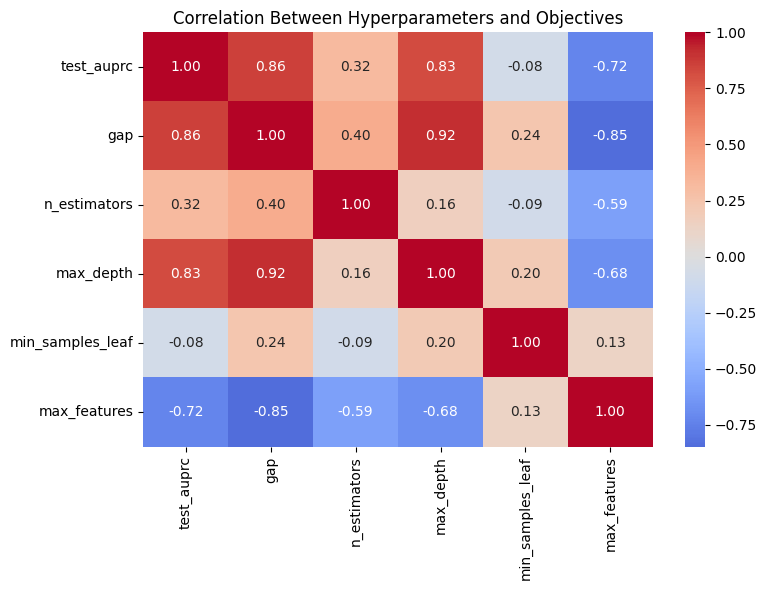

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#combine all solutions
all_solutions = [
    #NSGA-II
    {"method": "NSGA-II", "test_auprc": 0.4966, "gap": 0.4885, "n_estimators": 34, "max_depth": 3, "min_samples_leaf": 11, "max_features": 0.317},
    {"method": "NSGA-II", "test_auprc": 0.4952, "gap": 0.4059, "n_estimators": 28, "max_depth": 2, "min_samples_leaf": 8, "max_features": 0.270},
    {"method": "NSGA-II", "test_auprc": 0.4909, "gap": 0.3980, "n_estimators": 28, "max_depth": 2, "min_samples_leaf": 11, "max_features": 0.269},
    {"method": "NSGA-II", "test_auprc": 0.4902, "gap": 0.1620, "n_estimators": 23, "max_depth": 1, "min_samples_leaf": 5, "max_features": 0.608},

    #MOPSO
    {"method": "MOPSO", "test_auprc": 0.4756, "gap": 0.1688, "n_estimators": 20.8, "max_depth": 1.0, "min_samples_leaf": 14.6, "max_features": 0.665},
    {"method": "MOPSO", "test_auprc": 0.4815, "gap": 0.1704, "n_estimators": 23.5, "max_depth": 1.0, "min_samples_leaf": 3.9, "max_features": 0.466},
    {"method": "MOPSO", "test_auprc": 0.4825, "gap": 0.1717, "n_estimators": 22.1, "max_depth": 1.4, "min_samples_leaf": 10.5, "max_features": 0.598},
    {"method": "MOPSO", "test_auprc": 0.4863, "gap": 0.1727, "n_estimators": 25.4, "max_depth": 1.0, "min_samples_leaf": 10.5, "max_features": 0.583},
    {"method": "MOPSO", "test_auprc": 0.4936, "gap": 0.3872, "n_estimators": 20.0, "max_depth": 2.3, "min_samples_leaf": 14.0, "max_features": 0.503},
    {"method": "MOPSO", "test_auprc": 0.5000, "gap": 0.4892, "n_estimators": 20.0, "max_depth": 3.9, "min_samples_leaf": 9.3, "max_features": 0.342},
]

#convert to DataFrame
df = pd.DataFrame(all_solutions)

#compute correlation matrix
corr = df.drop(columns=["method"]).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Between Hyperparameters and Objectives")
plt.tight_layout()
plt.show()


## Fitness Trends ##

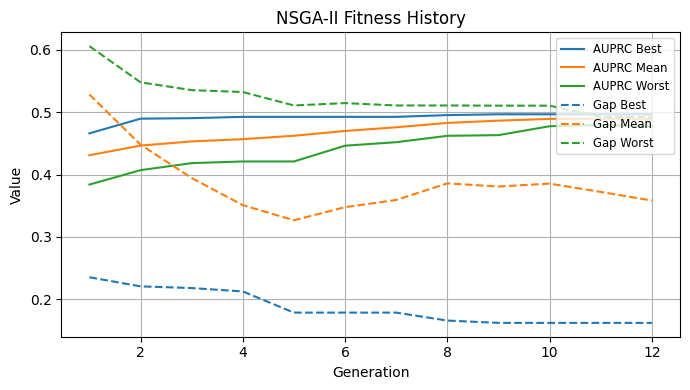

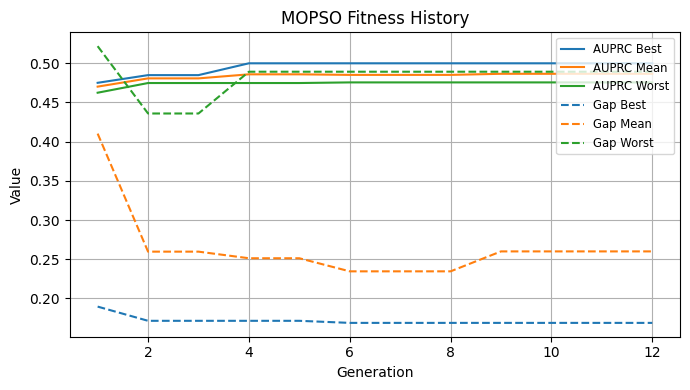

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

nsga2_history = pd.read_csv("project/nsga2_fitness_history.csv")
mopso_history = pd.read_csv("project/mopso_fitness_history.csv")

colors = {
    "best": "tab:blue",
    "mean": "tab:orange",
    "worst": "tab:green"
}

def plot_fitness_trends(history_df, title, filename):
    generations = history_df["gen"]

    #convert negative AUPRC to positive for plotting
    auprc_best = -history_df["obj1_best"]
    auprc_mean = -history_df["obj1_mean"]
    auprc_worst = -history_df["obj1_worst"]

    gap_best = history_df["obj2_best"]
    gap_mean = history_df["obj2_mean"]
    gap_worst = history_df["obj2_worst"]

    fig, ax = plt.subplots(figsize=(7, 4))

    #AUPRC solid lines
    ax.plot(generations, auprc_best, label="AUPRC Best", color=colors["best"], linestyle="-")
    ax.plot(generations, auprc_mean, label="AUPRC Mean", color=colors["mean"], linestyle="-")
    ax.plot(generations, auprc_worst, label="AUPRC Worst", color=colors["worst"], linestyle="-")

    #gap dashed lines
    ax.plot(generations, gap_best, label="Gap Best", color=colors["best"], linestyle="--")
    ax.plot(generations, gap_mean, label="Gap Mean", color=colors["mean"], linestyle="--")
    ax.plot(generations, gap_worst, label="Gap Worst", color=colors["worst"], linestyle="--")

    ax.set_title(title)
    ax.set_xlabel("Generation")
    ax.set_ylabel("Value")
    ax.legend(loc="upper right", fontsize="small")
    ax.grid(True)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

plot_fitness_trends(nsga2_history, "NSGA-II Fitness History", "nsga2_fitness_plot.png")
plot_fitness_trends(mopso_history, "MOPSO Fitness History", "mopso_fitness_plot.png")
